### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under $20), \ coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [174]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

data = pd.read_csv('data/coupons.csv')

In [175]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

## Data Pruning/Filtering
### Drop the 'car' Variable

The 'car' column contains only 108 non-null values out of 12,684 entries, meaning 99.1% of the data is missing. Using such a small subset of data could introduce significant bias into our analysis and lead to unreliable conclusions. Its best to just drop this parameter from the analysis.


In [177]:
data = data.drop('car', axis=1)

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

### Rename Typo's
passanger => passenger

In [179]:
data = data.rename(columns={'passanger': 'passenger'})

In [180]:
from datetime import datetime

def convert_to_24hr(time_str):
    """
    Convert a time string in 12-hour format to 24-hour numeric format.
    
    Args:
    time_str (str): Time in format like "10PM", "6PM", "1AM"
    
    Returns:
    int: Hour in 24-hour format (0-23)
    """
    try:
        return int(datetime.strptime(time_str, "%I%p").strftime("%H"))
    except ValueError:
        return None  # Return None for any invalid time strings

# add another time_24hr column
data['time_24hr'] = data['time'].apply(convert_to_24hr)

In [181]:
data.sample(10)

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,time_24hr
2742,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,36,Single,0,Some college - no degree,Sales & Related,$50000 - $62499,never,never,less1,4~8,less1,1,0,0,0,1,0,18
5603,Work,Alone,Sunny,80,7AM,Coffee House,2h,Male,below21,Single,0,Some college - no degree,Student,Less than $12500,never,less1,gt8,1~3,never,1,1,0,1,0,1,7
3887,Work,Alone,Sunny,55,7AM,Coffee House,2h,Female,26,Married partner,0,Bachelors degree,Healthcare Practitioners & Technical,$100000 or More,never,1~3,1~3,4~8,less1,1,1,0,0,1,0,7
9877,Work,Alone,Snowy,30,7AM,Carry out & Take away,1d,Male,36,Single,0,Some college - no degree,Office & Administrative Support,$25000 - $37499,less1,never,less1,less1,less1,1,1,0,1,0,1,7
12156,No Urgent Place,Friend(s),Snowy,30,2PM,Restaurant(<20),1d,Female,31,Single,0,Associates degree,Arts Design Entertainment Sports & Media,$75000 - $87499,NaN,less1,gt8,1~3,less1,1,0,0,0,1,0,14
1163,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Female,31,Married partner,0,Some college - no degree,Computer & Mathematical,$100000 or More,less1,less1,gt8,4~8,less1,1,0,0,1,0,0,7
5949,No Urgent Place,Partner,Sunny,80,6PM,Bar,2h,Female,21,Married partner,0,Some college - no degree,Unemployed,$37500 - $49999,less1,less1,1~3,1~3,1~3,1,1,0,0,1,0,18
75,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,46,Married partner,1,Bachelors degree,Education&Training&Library,$75000 - $87499,less1,1~3,1~3,1~3,less1,1,1,0,0,1,1,10
5137,Home,Alone,Sunny,80,6PM,Restaurant(<20),2h,Male,21,Single,0,Bachelors degree,Student,$50000 - $62499,less1,never,4~8,less1,never,1,0,0,1,0,1,18
11579,Home,Alone,Sunny,80,6PM,Carry out & Take away,2h,Male,36,Unmarried partner,0,Some college - no degree,Construction & Extraction,$25000 - $37499,never,4~8,4~8,less1,less1,1,1,0,1,0,1,18


In [182]:
data.isnull().sum()

destination               0
passenger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
time_24hr                 0
dtype: int64

In [183]:
nan_rows = data[data.isnull().any(axis=1)]

In [184]:
nan_rows.sample(10)

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,time_24hr
507,No Urgent Place,Partner,Sunny,80,6PM,Bar,1d,Male,26,Unmarried partner,0,Bachelors degree,Community & Social Services,$12500 - $24999,never,NaN,less1,less1,less1,1,1,0,0,1,0,18
4732,Home,Alone,Sunny,80,10PM,Restaurant(<20),2h,Male,below21,Single,0,Some college - no degree,Student,$87500 - $99999,never,4~8,NaN,4~8,less1,1,0,0,1,0,0,22
5653,No Urgent Place,Alone,Sunny,80,10AM,Bar,1d,Female,31,Single,1,Bachelors degree,Production Occupations,$37500 - $49999,less1,less1,4~8,NaN,less1,1,0,0,0,1,0,10
12303,Work,Alone,Snowy,30,7AM,Bar,1d,Female,50plus,Widowed,1,High School Graduate,Retired,$12500 - $24999,never,never,4~8,1~3,NaN,1,1,1,0,1,0,7
2878,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,36,Married partner,1,Bachelors degree,Education&Training&Library,$50000 - $62499,NaN,1~3,4~8,1~3,1~3,1,1,0,0,1,1,14
503,No Urgent Place,Partner,Sunny,80,10AM,Restaurant(20-50),1d,Male,26,Unmarried partner,0,Bachelors degree,Community & Social Services,$12500 - $24999,never,NaN,less1,less1,less1,1,0,0,0,1,1,10
8966,Home,Kid(s),Sunny,80,10PM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Food Preparation & Serving Related,Less than $12500,never,1~3,4~8,NaN,4~8,1,1,0,0,1,0,22
3568,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Male,21,Single,0,Bachelors degree,Arts Design Entertainment Sports & Media,$50000 - $62499,gt8,1~3,NaN,4~8,less1,1,0,0,0,1,0,14
4883,No Urgent Place,Kid(s),Sunny,55,2PM,Coffee House,2h,Male,31,Married partner,1,Bachelors degree,Management,$50000 - $62499,never,never,never,less1,NaN,1,1,0,0,1,0,14
3572,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,21,Single,0,Bachelors degree,Arts Design Entertainment Sports & Media,$50000 - $62499,gt8,1~3,NaN,4~8,less1,1,1,0,0,1,0,18


## NaN/NULL handling

The NaN/NULL values are for the poll for various types of coupons, whoever wrote the survey should have set this to 0 rather than keeping it undefined, we can probably set all of these to 0 which is kind of never. 


In [185]:
# Fill NaN values with 0
data = data.fillna(0)

# Verify 
print(data.isnull().sum())

# Verify data types
print("\nData types after filling NaN:")
print(data.dtypes)


destination             0
passenger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
time_24hr               0
dtype: int64

Data types after filling NaN:
destination             object
passenger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
m

4. What proportion of the total observations chose to accept the coupon?

In [186]:
acceptance_rate = data['Y'].mean()
print(f"Overall acceptance rate: {acceptance_rate:.2%}")

Overall acceptance rate: 56.84%


5. Use a bar plot to visualize the `coupon` column.

coupon
Carry out & Take away    0.735478
Restaurant(<20)          0.707107
Coffee House             0.499249
Restaurant(20-50)        0.441019
Bar                      0.410015
Name: Y, dtype: float64


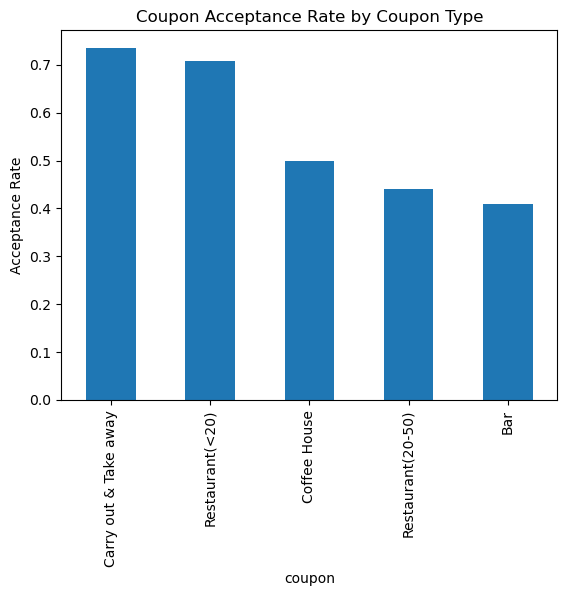

In [187]:
ca_coupon = data.groupby('coupon')['Y'].mean().sort_values(ascending=False)
print(ca_coupon)
ca_coupon.plot(kind='bar')
plt.title('Coupon Acceptance Rate by Coupon Type')
plt.ylabel('Acceptance Rate')
plt.show()

weather
Sunny    0.594796
Snowy    0.470463
Rainy    0.462810
Name: Y, dtype: float64


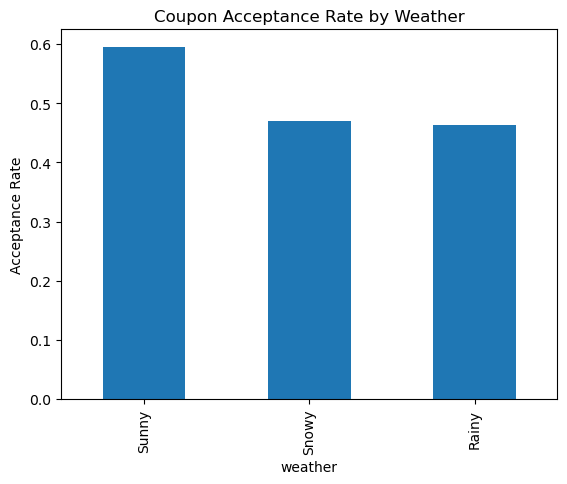

In [188]:
ca_weather = data.groupby('weather')['Y'].mean().sort_values(ascending=False)
print(ca_weather)
ca_weather.plot(kind='bar')
plt.title('Coupon Acceptance Rate by Weather')
plt.ylabel('Acceptance Rate')
plt.show()

time_24hr
14    0.661523
10    0.608352
18    0.584520
22    0.508475
7     0.502212
Name: Y, dtype: float64


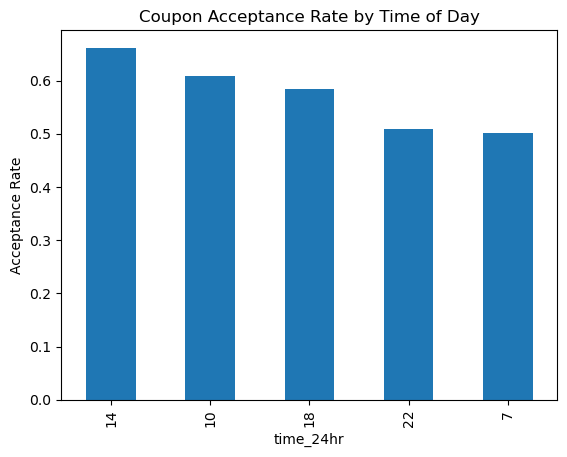

In [189]:
ca_time = data.groupby('time_24hr')['Y'].mean().sort_values(ascending=False)
print(ca_time)
ca_time.plot(kind='bar')
plt.title('Coupon Acceptance Rate by Time of Day')
plt.ylabel('Acceptance Rate')
plt.show()

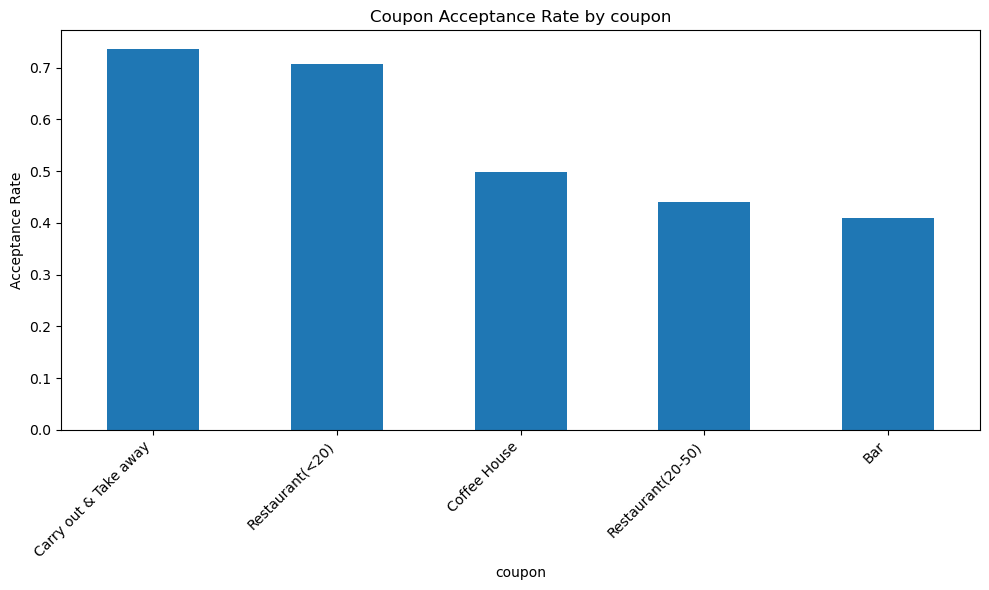


Acceptance rates for coupon:
coupon
Carry out & Take away    0.735478
Restaurant(<20)          0.707107
Coffee House             0.499249
Restaurant(20-50)        0.441019
Bar                      0.410015
Name: Y, dtype: float64


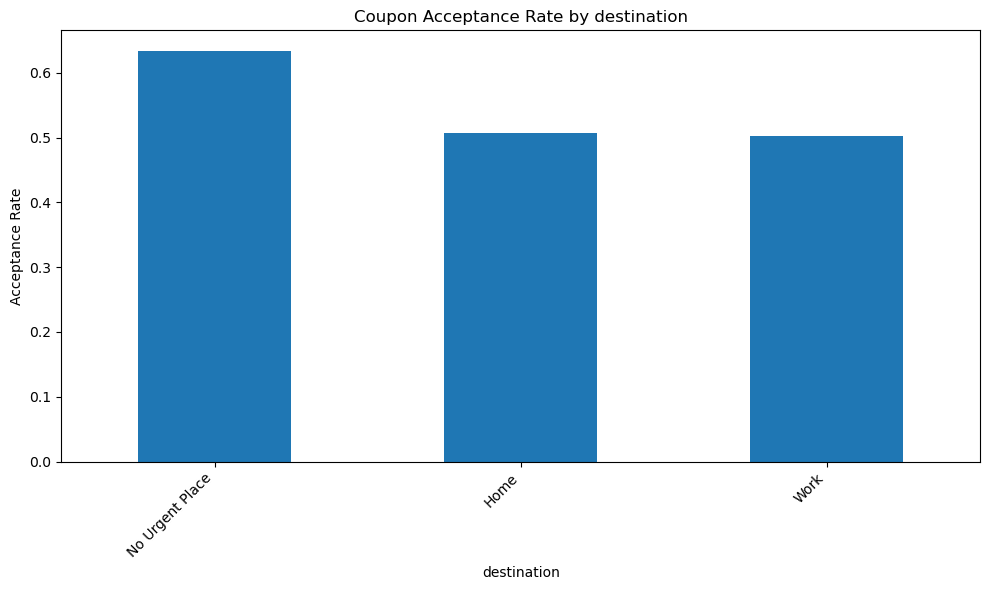


Acceptance rates for destination:
destination
No Urgent Place    0.633774
Home               0.506333
Work               0.502212
Name: Y, dtype: float64


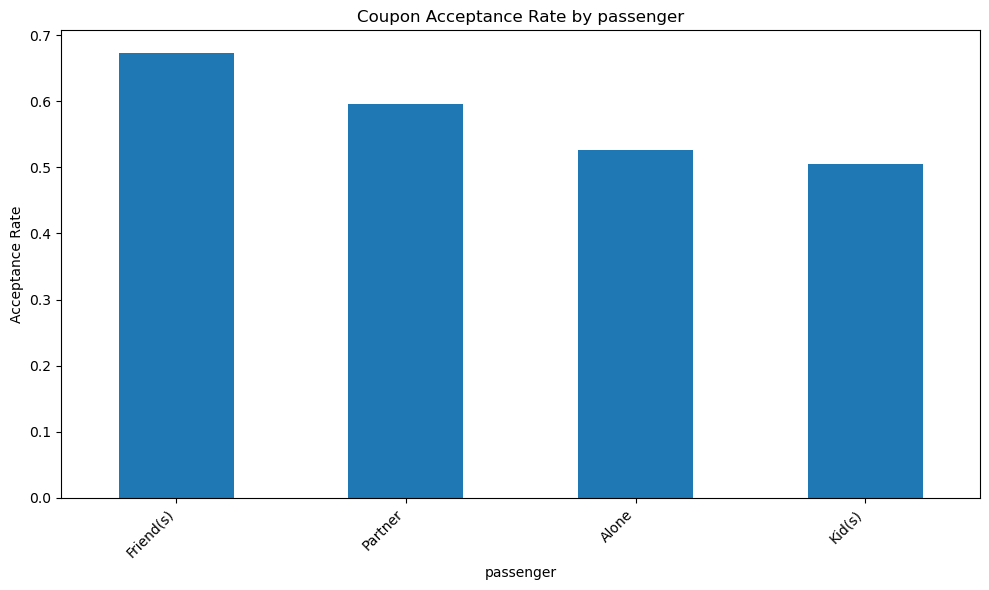


Acceptance rates for passenger:
passenger
Friend(s)    0.673438
Partner      0.595349
Alone        0.525804
Kid(s)       0.504970
Name: Y, dtype: float64


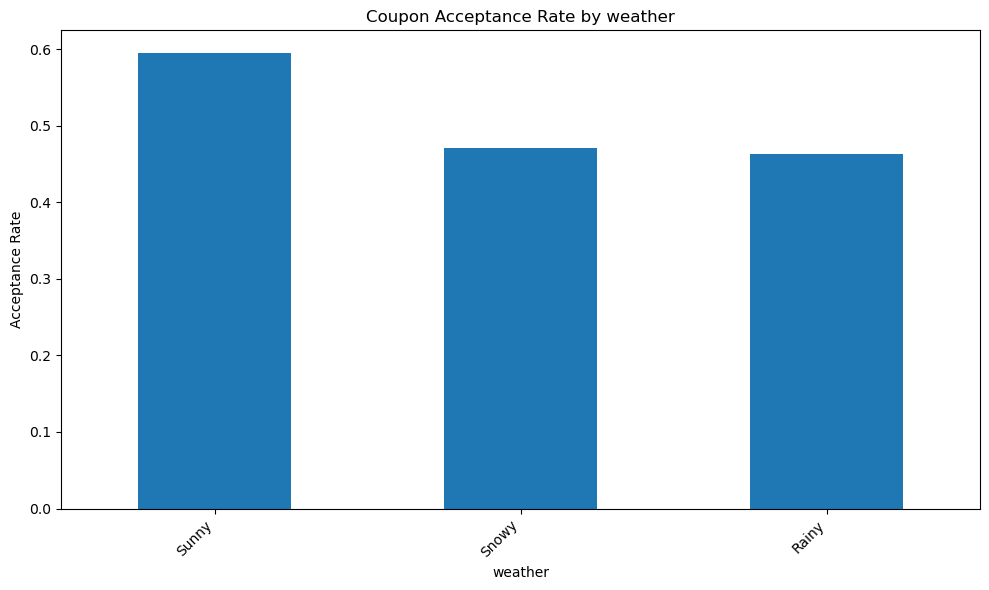


Acceptance rates for weather:
weather
Sunny    0.594796
Snowy    0.470463
Rainy    0.462810
Name: Y, dtype: float64


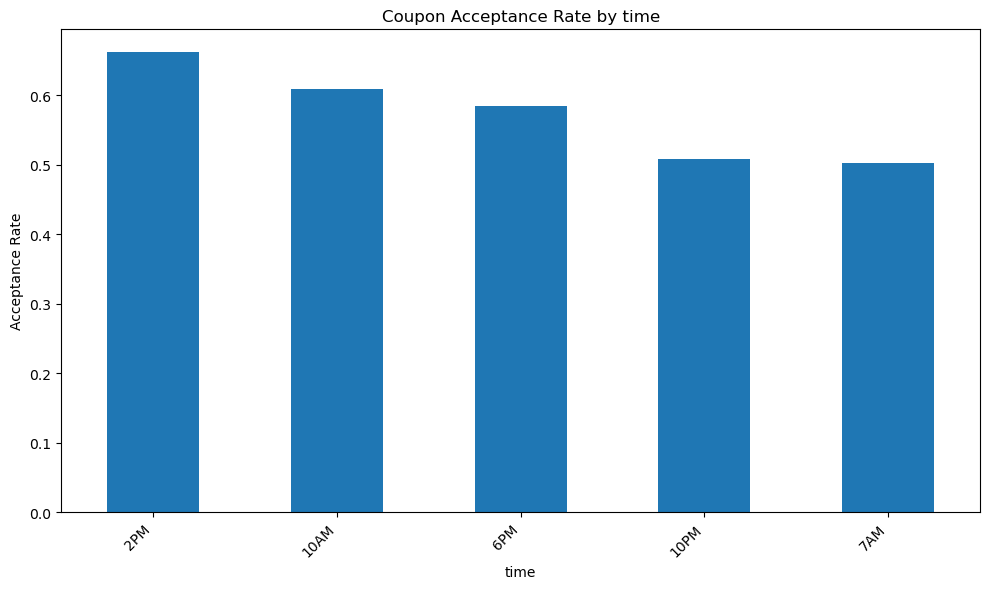


Acceptance rates for time:
time
2PM     0.661523
10AM    0.608352
6PM     0.584520
10PM    0.508475
7AM     0.502212
Name: Y, dtype: float64


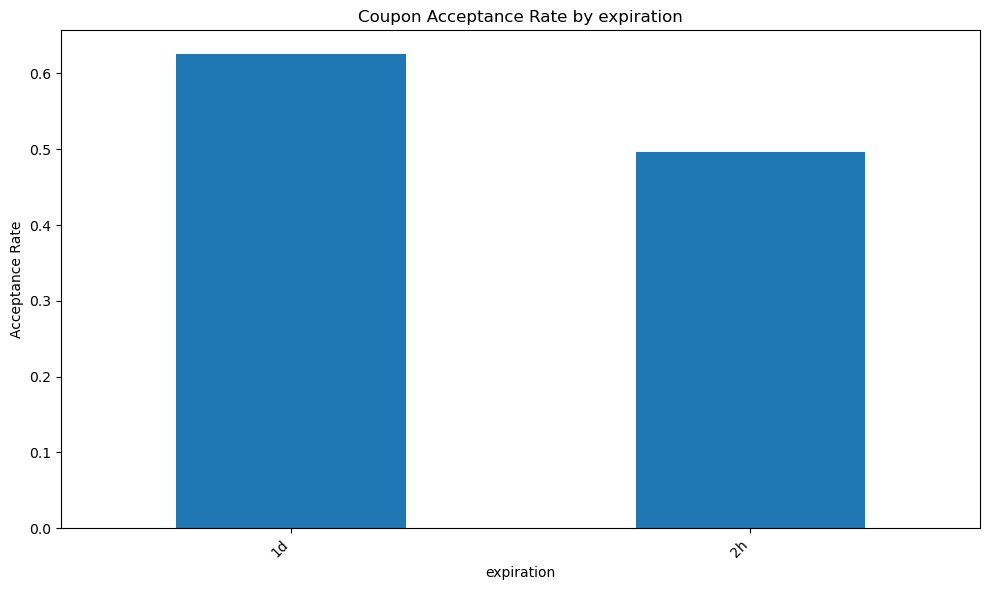


Acceptance rates for expiration:
expiration
1d    0.625582
2h    0.495977
Name: Y, dtype: float64


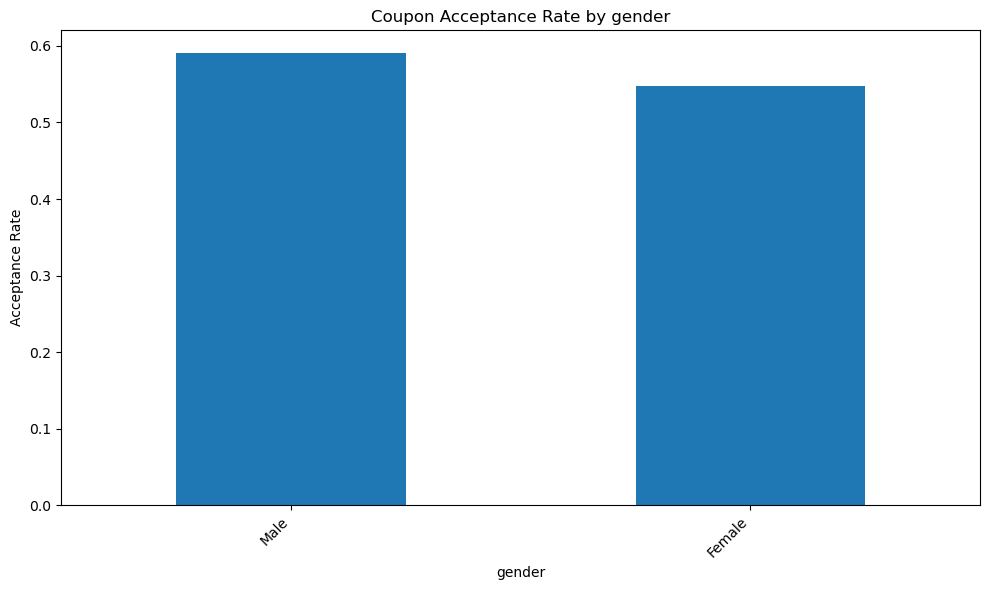


Acceptance rates for gender:
gender
Male      0.590799
Female    0.547228
Name: Y, dtype: float64


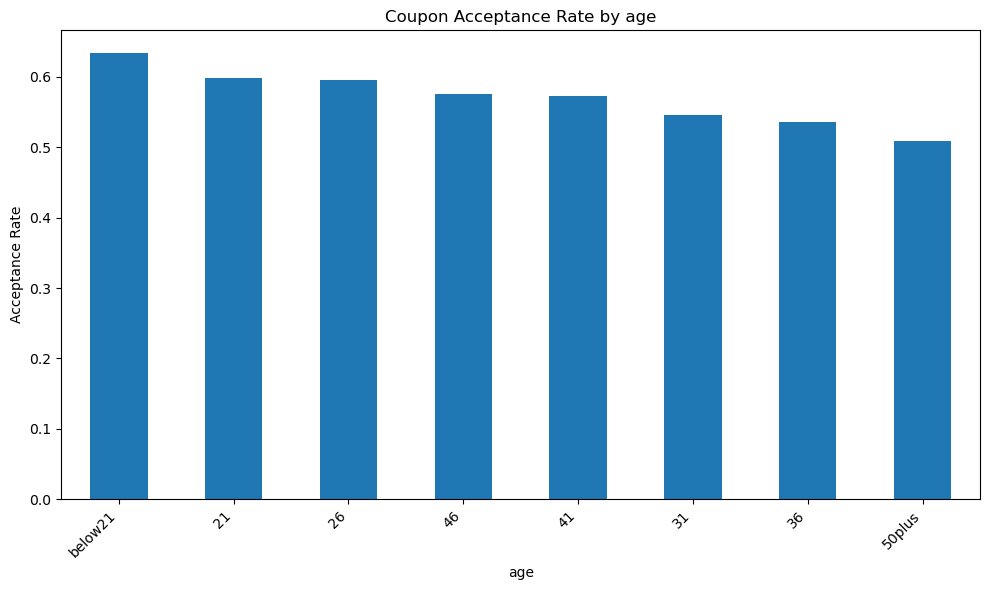


Acceptance rates for age:
age
below21    0.634369
21         0.598191
26         0.595936
46         0.575802
41         0.572736
31         0.546346
36         0.535254
50plus     0.508949
Name: Y, dtype: float64


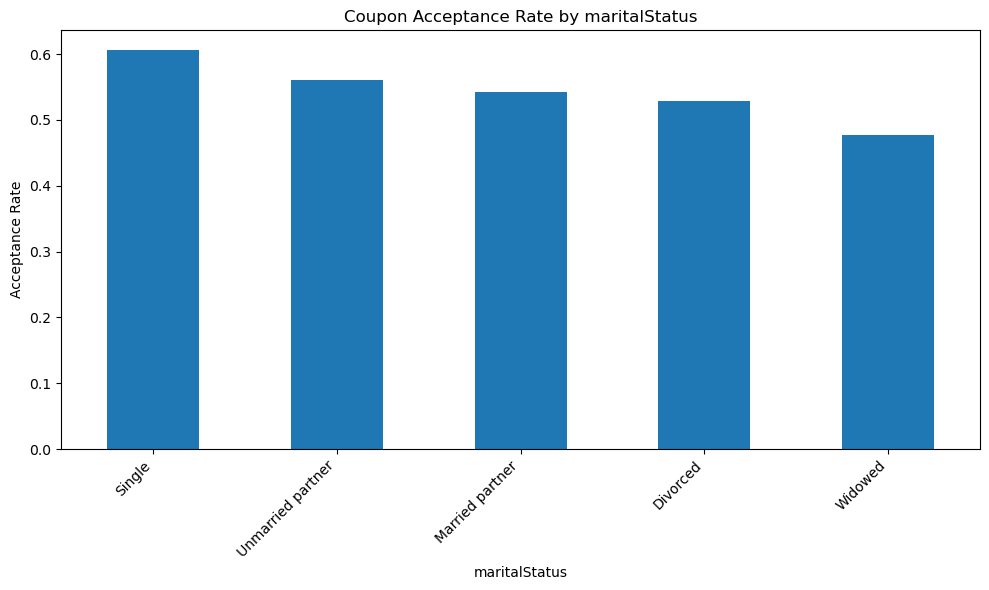


Acceptance rates for maritalStatus:
maritalStatus
Single               0.605850
Unmarried partner    0.561299
Married partner      0.542941
Divorced             0.529070
Widowed              0.476923
Name: Y, dtype: float64


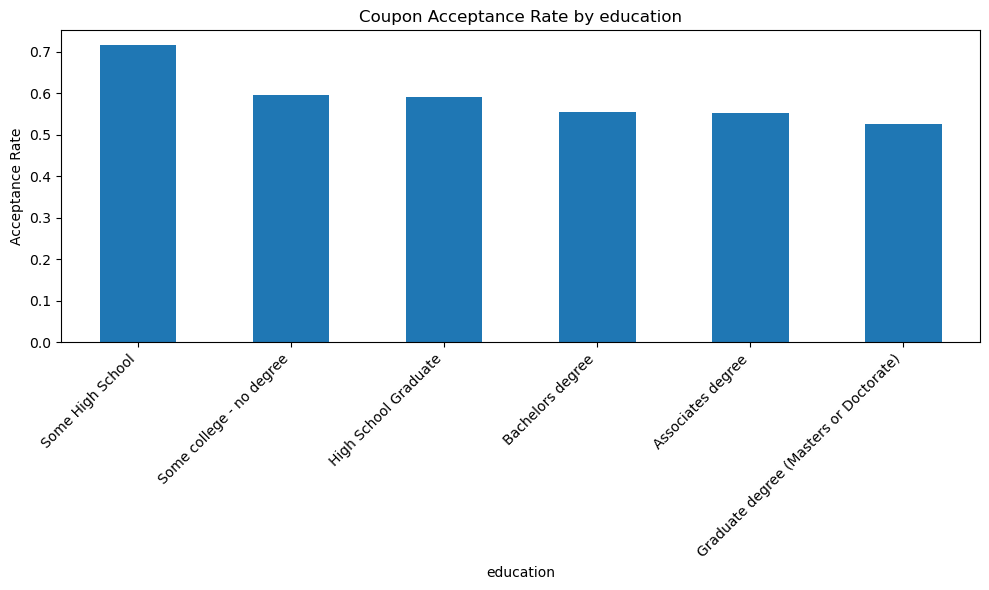


Acceptance rates for education:
education
Some High School                          0.715909
Some college - no degree                  0.596415
High School Graduate                      0.592265
Bachelors degree                          0.554325
Associates degree                         0.553339
Graduate degree (Masters or Doctorate)    0.526458
Name: Y, dtype: float64


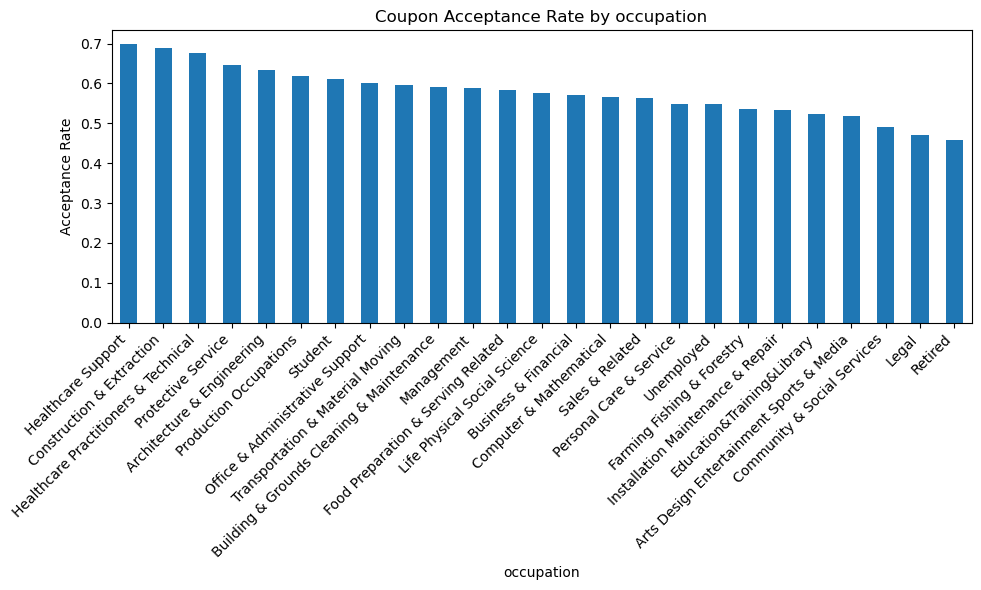


Acceptance rates for occupation:
occupation
Healthcare Support                           0.698347
Construction & Extraction                    0.688312
Healthcare Practitioners & Technical         0.676230
Protective Service                           0.645714
Architecture & Engineering                   0.634286
Production Occupations                       0.618182
Student                                      0.610480
Office & Administrative Support              0.600939
Transportation & Material Moving             0.596330
Building & Grounds Cleaning & Maintenance    0.590909
Management                                   0.588305
Food Preparation & Serving Related           0.583893
Life Physical Social Science                 0.576471
Business & Financial                         0.569853
Computer & Mathematical                      0.566761
Sales & Related                              0.562672
Personal Care & Service                      0.548571
Unemployed                           

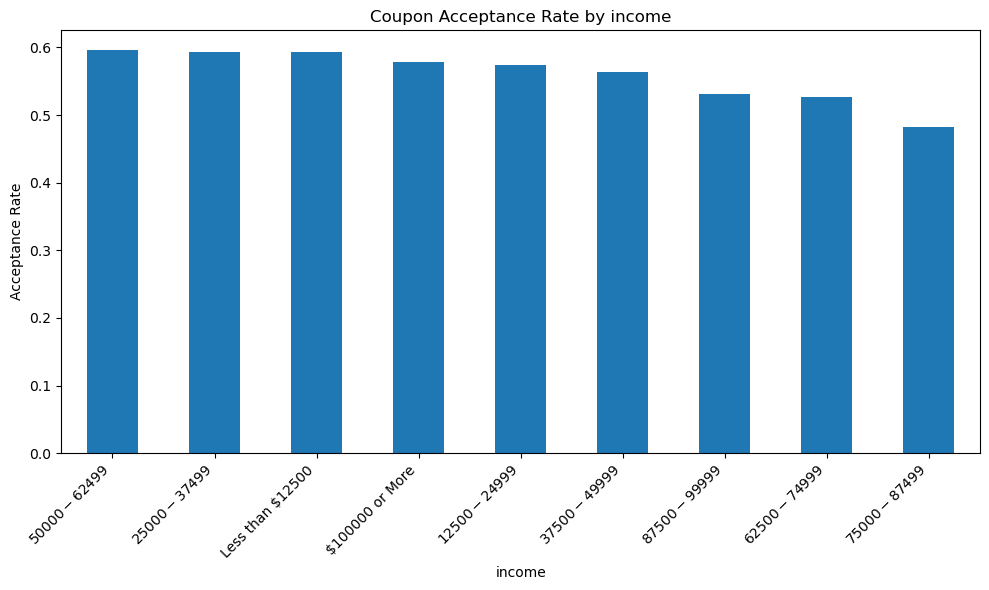


Acceptance rates for income:
income
$50000 - $62499     0.595539
$25000 - $37499     0.593145
Less than $12500    0.593090
$100000 or More     0.578341
$12500 - $24999     0.574549
$37500 - $49999     0.563989
$87500 - $99999     0.531844
$62500 - $74999     0.527187
$75000 - $87499     0.483081
Name: Y, dtype: float64


In [190]:
# Plot for Everything...
def plot_acceptance_rate(data, column):
    acceptance_rate = data.groupby(column)['Y'].mean().sort_values(ascending=False)
    
    #  plot
    plt.figure(figsize=(10, 6))
    acceptance_rate.plot(kind='bar')
    plt.title(f'Coupon Acceptance Rate by {column}')
    plt.ylabel('Acceptance Rate')
    plt.xlabel(column)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Print  rates
    print(f"\nAcceptance rates for {column}:")
    print(acceptance_rate)

# Cols  to analyze
columns_to_analyze = ['coupon', 'destination', 'passenger', 'weather', 'time', 
                      'expiration', 'gender', 'age', 'maritalStatus', 'education', 
                      'occupation', 'income']

# Loop 
for column in columns_to_analyze:
    plot_acceptance_rate(data, column)

In [191]:
data.sample(5)

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,time_24hr
9671,No Urgent Place,Alone,Rainy,55,10AM,Coffee House,1d,Male,21,Single,1,Some college - no degree,Student,$62500 - $74999,never,never,4~8,1~3,1~3,1,1,0,0,1,1,10
2942,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,50plus,Married partner,1,Some college - no degree,Computer & Mathematical,$37500 - $49999,1~3,less1,4~8,1~3,1~3,1,1,0,0,1,1,14
5522,No Urgent Place,Alone,Sunny,80,10AM,Bar,1d,Female,50plus,Single,0,High School Graduate,Management,$37500 - $49999,less1,less1,less1,less1,1~3,1,0,0,0,1,0,10
6381,Work,Alone,Sunny,80,7AM,Coffee House,2h,Female,26,Unmarried partner,0,Bachelors degree,Management,$62500 - $74999,1~3,gt8,gt8,gt8,gt8,1,1,0,1,0,0,7
4978,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,21,Single,0,Bachelors degree,Sales & Related,$100000 or More,less1,4~8,1~3,4~8,1~3,1,1,0,0,1,1,7


6. Use a histogram to visualize the temperature column.

In [192]:
data['temperature'].describe()


count    12684.000000
mean        63.301798
std         19.154486
min         30.000000
25%         55.000000
50%         80.000000
75%         80.000000
max         80.000000
Name: temperature, dtype: float64

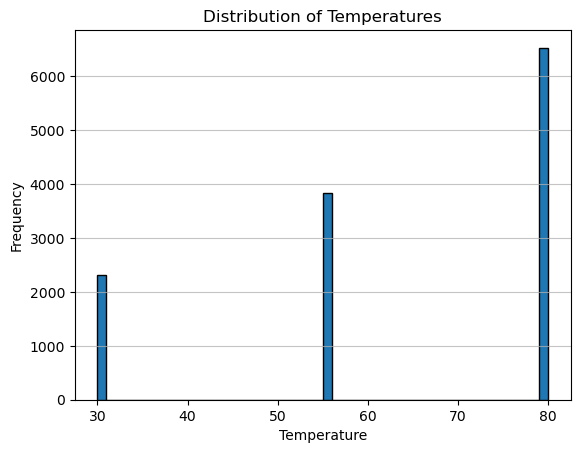

In [193]:
# Create the histogram
plt.hist(data['temperature'], bins=50, edgecolor='black')

# Customize the plot
plt.title('Distribution of Temperatures')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Add grid lines for better readability
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [194]:
bar_coupons = data[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [195]:
caba=bar_coupons['Y'].mean()
print(f"Proportion of bar coupons accepted: {caba:.2%}")


Proportion of bar coupons accepted: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [196]:
bar_coupons = data[data['coupon'] == 'Bar'].copy() #added because of a python warning... 

bar_coupons['frequent_bar'] = bar_coupons['Bar'].apply(lambda x: 'More than 3' if x in ['4~8', 'gt8'] else '3 or fewer')

less_frequent = bar_coupons[bar_coupons['frequent_bar'] == '3 or fewer']
more_frequent = bar_coupons[bar_coupons['frequent_bar'] == 'More than 3']

less_frequent_rate = less_frequent['Y'].mean()
more_frequent_rate = more_frequent['Y'].mean()

print(f"Acceptance rate for 3 or fewer visits: {less_frequent_rate:.2%}")
print(f"Acceptance rate for more than 3 visits: {more_frequent_rate:.2%}")

total = len(bar_coupons)
less_frequent_percent = len(less_frequent) / total * 100
more_frequent_percent = len(more_frequent) / total * 100

print(f"\nPercentage of people who visit 3 or fewer times: {less_frequent_percent:.1f}%")
print(f"Percentage of people who visit more than 3 times: {more_frequent_percent:.1f}%")


Acceptance rate for 3 or fewer visits: 37.07%
Acceptance rate for more than 3 visits: 76.88%

Percentage of people who visit 3 or fewer times: 90.1%
Percentage of people who visit more than 3 times: 9.9%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [197]:
bar_coupons.sample(10)
bar_coupons['age'].unique()


array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [198]:
def convert_age(age):
    if age == 'below21':
        return 20  # Assuming 'below21' means 20 or younger
    elif age == '50plus':
        return 51  # As requested, substituting '50plus' with 51
    else:
        return int(age.split('~')[0])  # For ranges like '25~30', take the lower bound
bar_coupons['age_int'] = bar_coupons['age'].apply(convert_age)


In [199]:
bar_coupons['target_group'] = (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8']) & 
                               (bar_coupons['age_int'] > 25))

target_group = bar_coupons[bar_coupons['target_group']]
others = bar_coupons[~bar_coupons['target_group']]

target_rate = target_group['Y'].mean()
others_rate = others['Y'].mean()

print("Acceptance Rates:")
print(f"Drivers who go to a bar more than once a month and are over 25: {target_rate:.2%}")
print(f"All others: {others_rate:.2%}")

difference = target_rate - others_rate
print(f"\nDifference in acceptance rates: {difference:.2%}")

print(f"\nTarget group size: {len(target_group)}")
print(f"Others group size: {len(others)}")


Acceptance Rates:
Drivers who go to a bar more than once a month and are over 25: 69.52%
All others: 33.50%

Difference in acceptance rates: 36.02%

Target group size: 420
Others group size: 1597


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [200]:
bar_coupons['frequent_bar_goers'] = bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])

bar_coupons['specific_passengers_and_occupation'] = (
    (~bar_coupons['passenger'].isin(['Kid', 'Alone'])) & 
    (bar_coupons['occupation'] != 'Farming Fishing & Forestry')
)


# get acceptance rates
frequent_goers_rate = bar_coupons[bar_coupons['frequent_bar_goers']]['Y'].mean()
specific_group_rate = bar_coupons[bar_coupons['specific_passengers_and_occupation']]['Y'].mean()

print("Acceptance Rates:")
print(f"Drivers who go to bars more than once a month: {frequent_goers_rate:.2%}")
print(f"Drivers with specific passengers and occupations: {specific_group_rate:.2%}")

# get the difference
difference = frequent_goers_rate - specific_group_rate
print(f"\nDifference in acceptance rates: {difference:.2%}")

# get group sizes
frequent_goers_size = bar_coupons['frequent_bar_goers'].sum()
specific_group_size = bar_coupons['specific_passengers_and_occupation'].sum()

print(f"\nFrequent bar goers group size: {frequent_goers_size}")
print(f"Specific passengers and occupation group size: {specific_group_size}")

# calculate the percentage
total = len(bar_coupons)
print(f"\nFrequent bar goers percentage: {frequent_goers_size/total:.2%}")
print(f"Specific passengers and occupation percentage: {specific_group_size/total:.2%}")

Acceptance Rates:
Drivers who go to bars more than once a month: 68.79%
Drivers with specific passengers and occupations: 41.45%

Difference in acceptance rates: 27.34%

Frequent bar goers group size: 596
Specific passengers and occupation group size: 813

Frequent bar goers percentage: 29.55%
Specific passengers and occupation percentage: 40.31%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [201]:

# Define the three groups
bar_coupons['group1'] = (
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (bar_coupons['passenger'] != 'Kid') & 
    (bar_coupons['maritalStatus'] != 'Widowed')
)

bar_coupons['group2'] = (
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (bar_coupons['age_int'] < 30)
)

bar_coupons['group3'] = (
    (bar_coupons['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & 
    (bar_coupons['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))
)

# Calculate acceptance 
group1_rate = bar_coupons[bar_coupons['group1']]['Y'].mean()
group2_rate = bar_coupons[bar_coupons['group2']]['Y'].mean()
group3_rate = bar_coupons[bar_coupons['group3']]['Y'].mean()

print("Acceptance Rates:")
print(f"Group 1: {group1_rate:.2%}")
print(f"Group 2: {group2_rate:.2%}")
print(f"Group 3: {group3_rate:.2%}")

# get group sizes
group1_size = bar_coupons['group1'].sum()
group2_size = bar_coupons['group2'].sum()
group3_size = bar_coupons['group3'].sum()

print(f"\nGroup 1 size: {group1_size}")
print(f"Group 2 size: {group2_size}")
print(f"Group 3 size: {group3_size}")

# calculate the percentage
total = len(bar_coupons)
print(f"\nGroup 1 percentage: {group1_size/total:.2%}")
print(f"Group 2 percentage: {group2_size/total:.2%}")
print(f"Group 3 percentage: {group3_size/total:.2%}")

Acceptance Rates:
Group 1: 68.79%
Group 2: 72.17%
Group 3: 45.35%

Group 1 size: 596
Group 2 size: 345
Group 3 size: 344

Group 1 percentage: 29.55%
Group 2 percentage: 17.10%
Group 3 percentage: 17.06%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

# Analysis of Bar Coupon Acceptance in Ride-sharing Context

## Overview
The analysis of the provided dataset on coupon acceptance rates in a ride-sharing scenario, focusing specifically on bar coupons. The analysis reveals several interesting patterns and potential factors influencing coupon acceptance.

## Findings

### 1. Overall Acceptance Rate
The overall acceptance rate for bar coupons is 41.00%, which is lower than some other coupon types like "Carry out & Take away" (73.55%) and "Restaurant(<20)" (70.71%). This suggests that bar coupons might be inherently less appealing or subject to more complex decision factors.

### 2. Frequency of Bar Visits
There's a strong correlation between the frequency of bar visits and coupon acceptance:
- 3 or fewer visits per month: 37.07% acceptance rate (90.1% of the sample)
- More than 3 visits per month: 76.88% acceptance rate (9.9% of the sample)

This substantial difference (39.81 percentage points) indicates that frequent bar-goers are much more likely to accept bar coupons. It's a crucial factor to consider in targeting strategies.

### 3. Age and Bar Visit Frequency
Drivers over 25 who visit bars more than once a month show a 69.52% acceptance rate, compared to 33.50% for others. This 36.02 percentage point difference highlights the importance of both age and visit frequency as predictors.

### 4. Passenger Type and Occupation
Drivers who frequently visit bars, have non-child passengers, and work outside farming, fishing, or forestry have a 68.79% acceptance rate. This specific combination of factors outperforms the general population by 27.34 percentage points, suggesting these characteristics are strong predictors of coupon acceptance.

### 5. Comparative Group Analysis
Three specific groups were analyzed:
1. Frequent bar-goers, non-child passengers, not widowed: 68.79% acceptance (29.55% of sample)
2. Frequent bar-goers under 30: 72.17% acceptance (17.10% of sample)
3. Frequent cheap restaurant-goers, income < 50K: 45.35% acceptance (17.06% of sample)

Group 2 shows the highest acceptance rate, reinforcing the importance of age and bar visit frequency.

## Hypothesis on Bar Coupon Acceptors

Based on these observations, I hypothesize that drivers who accept bar coupons are likely to fit the following profile:

1. **Frequent Bar Patrons**: The strongest predictor appears to be the frequency of bar visits. Those visiting more than 3 times a month are highly likely to accept coupons.

2. **Young Adults**: Particularly those under 30, but over 25. This age group seems to have both the interest in bar visits and the disposable income to act on coupons.

3. **Social Context**: Drivers with friends as passengers or in social situations are more likely to accept. This aligns with the nature of bar visits as social activities.

4. **Flexible Schedule**: Higher acceptance rates for those without urgent destinations suggest that time flexibility plays a role.

5. **Income and Spending Habits**: While not the strongest factor, there's an indication that middle-income individuals who frequent cheaper dining options are moderately receptive to bar coupons.

6. **Occupation**: Certain occupations (notably not farming, fishing, or forestry) seem more predisposed to accepting bar coupons, possibly related to lifestyle and work schedules.

7. **Marital Status**: Non-widowed individuals show higher acceptance rates, possibly due to differing social patterns.

8. **Gender**: There's a slight tendency towards higher acceptance among males, though this factor appears less significant than others.

## Implications for Targeting

To maximize the effectiveness of bar coupon campaigns:

1. Prioritize frequent bar visitors, especially those in the 25-30 age range.
2. Target users during non-urgent trips, particularly when passengers are present.
3. Consider time of day and day of week, aligning with typical social outings.
4. Tailor campaigns to middle-income areas may be with active nightlife scenes.
5. Potentially increase coupon value or appeal for demographics showing lower acceptance rates to boost overall performance.

## Further Analysis

To refine these findings, I would recommend:

1. Conducting a more detailed statistical analysis to quantify the significance of each factor.
2. Exploring interaction effects between variables (e.g., age and income, or weather and time of day).
3. Analyzing temporal patterns in coupon acceptance rates.
4. Investigating the impact of coupon characteristics (discount amount, expiration time) on acceptance rates.

This analysis provides a solid foundation for understanding bar coupon acceptance behavior, but there's potential for deeper insights with more advanced statistical techniques and possibly additional data points.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

## Coffee House analysis
Lets look at how the people who go to coffe houses look. 

In [202]:
coffee_data = data[data['coupon'] == 'Coffee House']

#  acceptance rate for Coffee House coupons
overall_acceptance_rate = coffee_data['Y'].mean()

print(f"Overall acceptance rate for Coffee House coupons: {overall_acceptance_rate:.2%}")

Overall acceptance rate for Coffee House coupons: 49.92%



Acceptance rate by coffee house visit frequency:
CoffeeHouse
4~8      0.685874
gt8      0.657895
1~3      0.647793
less1    0.481860
0        0.458333
never    0.188781
Name: Y, dtype: float64


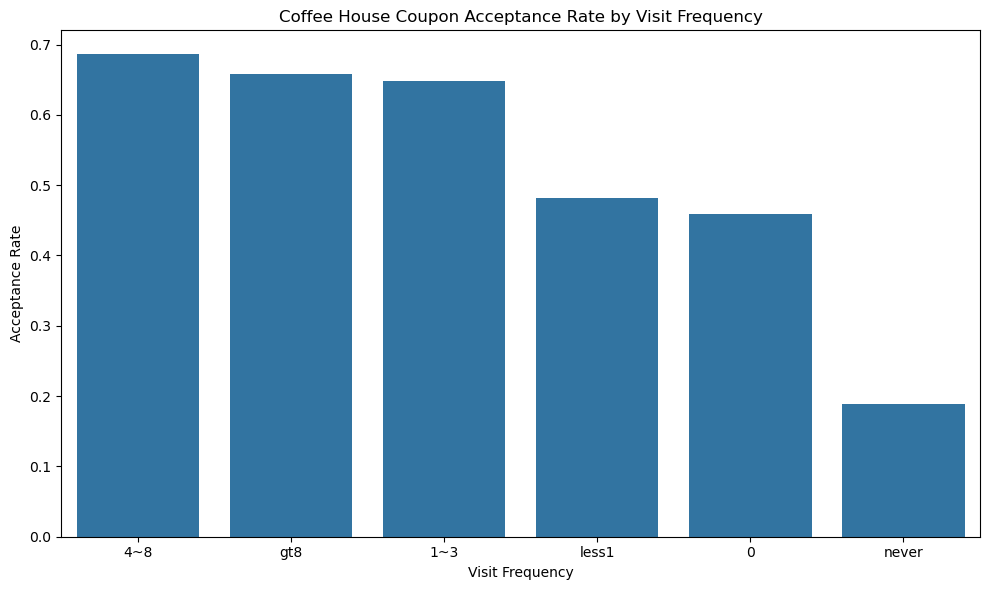

In [203]:
#  interaction between frequency of coffee house visits and acceptance rate
visit_frequency = coffee_data.groupby('CoffeeHouse')['Y'].mean().sort_values(ascending=False)

print("\nAcceptance rate by coffee house visit frequency:")
print(visit_frequency)

plt.figure(figsize=(10, 6))
sns.barplot(x=visit_frequency.index, y=visit_frequency.values)
plt.title("Coffee House Coupon Acceptance Rate by Visit Frequency")
plt.xlabel("Visit Frequency")
plt.ylabel("Acceptance Rate")
plt.tight_layout()
plt.show()

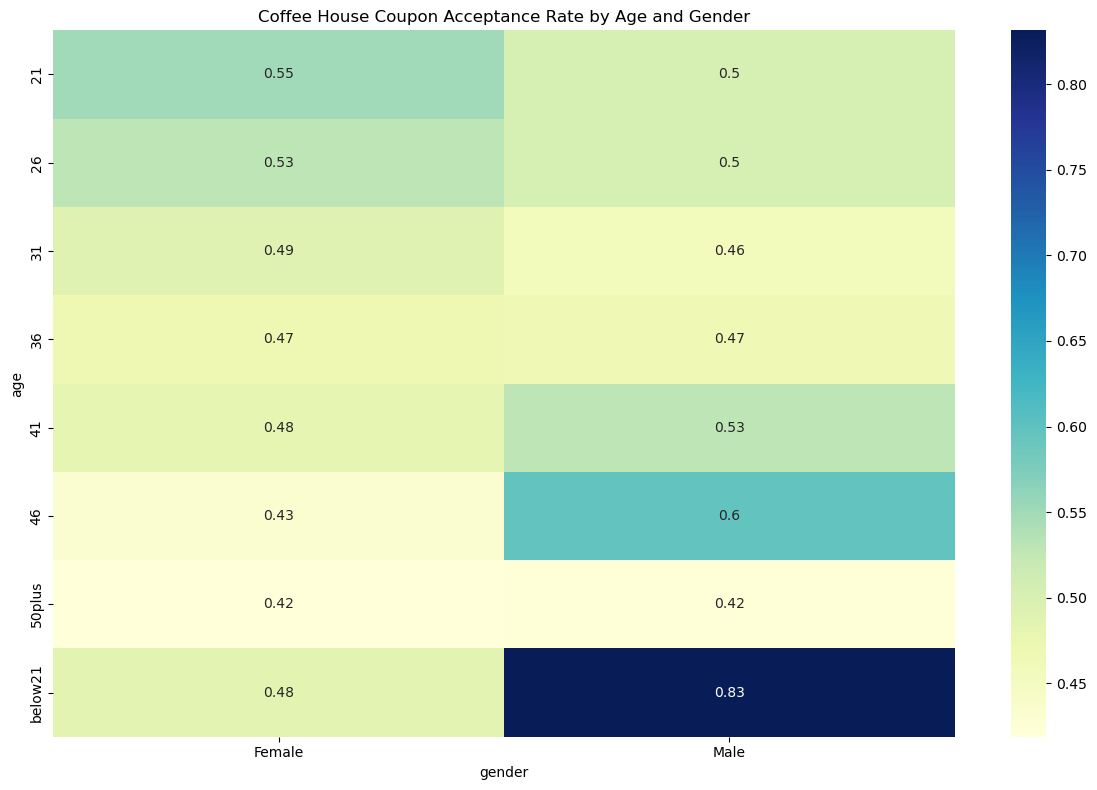

In [204]:
#  acceptance rate by age and gender
age_gender_acceptance = coffee_data.groupby(['age', 'gender'])['Y'].mean().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(age_gender_acceptance, annot=True, cmap='YlGnBu')
plt.title("Coffee House Coupon Acceptance Rate by Age and Gender")
plt.tight_layout()
plt.show()

## Age and Gender corelation

Looks like a Male below 21 is more likely to use a coffee coupon


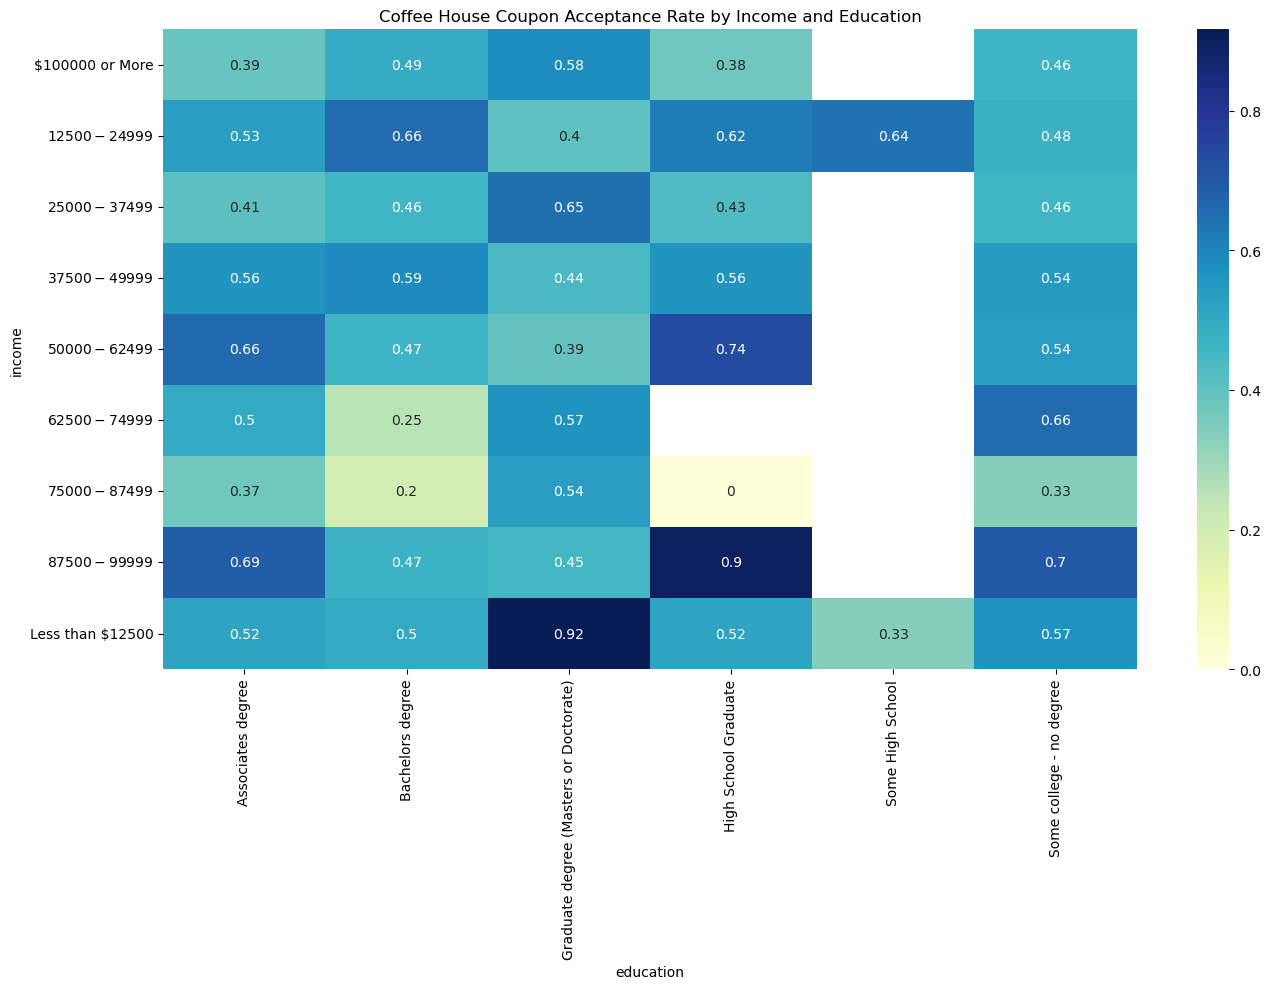

In [205]:
#  acceptance rate by income and education
income_edu_acceptance = coffee_data.groupby(['income', 'education'])['Y'].mean().unstack()

plt.figure(figsize=(14, 10))
sns.heatmap(income_edu_acceptance, annot=True, cmap='YlGnBu')
plt.title("Coffee House Coupon Acceptance Rate by Income and Education")
plt.tight_layout()
plt.show()

## Income + Education

A graduate with low income (or unemployed perhaps) is more likely to use a coffee coupon 

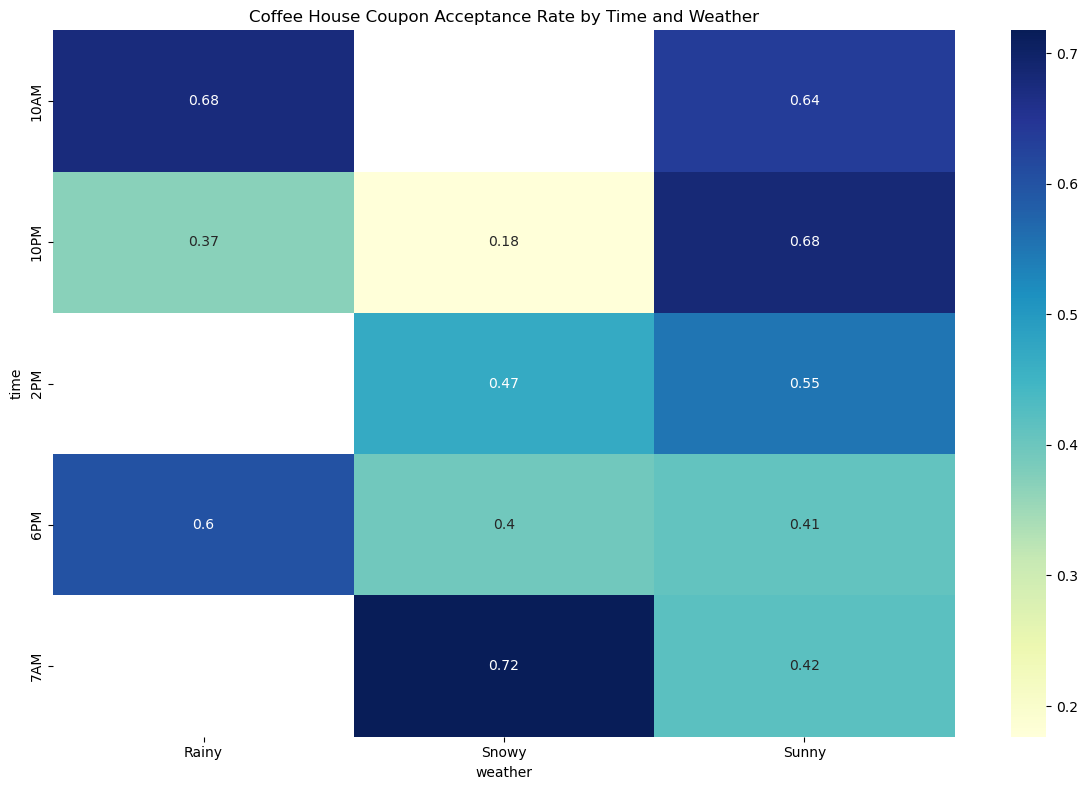

In [206]:
# acceptance rate by time of day and weather
time_weather_acceptance = coffee_data.groupby(['time', 'weather'])['Y'].mean().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(time_weather_acceptance, annot=True, cmap='YlGnBu')
plt.title("Coffee House Coupon Acceptance Rate by Time and Weather")
plt.tight_layout()
plt.show()

## Relation to Time and Weather

Is there is snowy weather, the odds are higher if the coupouns are given at 7am, and for other weathers in the monrning it seems to be at 10am 

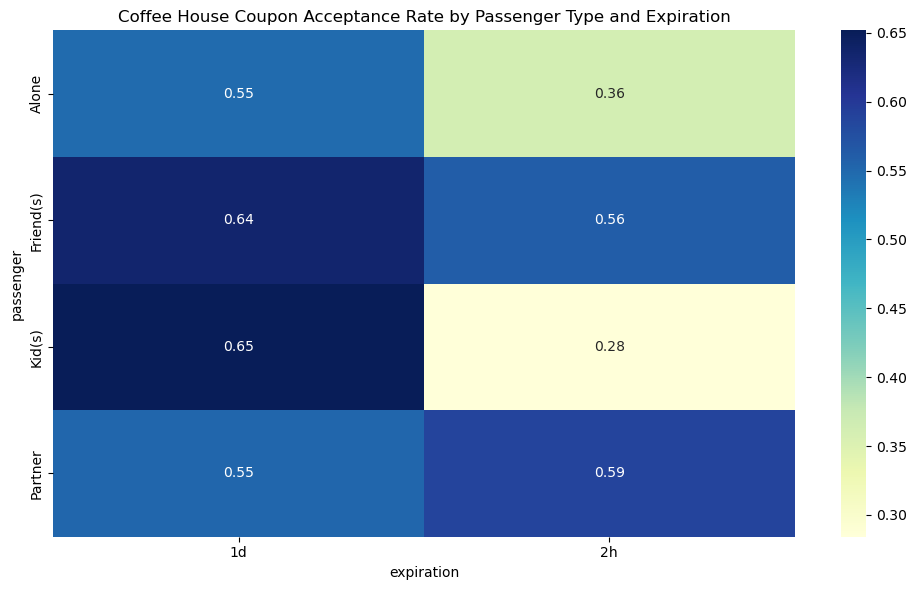

In [207]:
#  acceptance rate by passenger type and coupon expiration
passenger_expiration_acceptance = coffee_data.groupby(['passenger', 'expiration'])['Y'].mean().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(passenger_expiration_acceptance, annot=True, cmap='YlGnBu')
plt.title("Coffee House Coupon Acceptance Rate by Passenger Type and Expiration")
plt.tight_layout()
plt.show()

## relation to passenger type and expiration

this seems to be inconclusive ? if there is a kid or friend passenger there is more likely hood to get a coupon which expires next day.
